# <font color = blue> Bike Sharing Assignment </font>

<div class="alert alert-block alert-info">
<h1><b> Importing the required libraries</b></h1>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-info">
<h1><b> Loading and Inspecting the Dataset</b></h1>
</div>

In [3]:
# loading data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of dataset
day.shape

(730, 16)

In [5]:
# Info of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Summary of variables

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Check for missing values

In [8]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Remove irrelevant columns 

- **instant** column contains only index
- **dteday** column contains date. As we have seperate columns for year and month,so we can drop this.
- **casual** and **registered** columns contain the count of bikes. As we have total count of bikes in cnt, thus we can drop these two columns

In [9]:
# Remove "instant", "dteday", "casual", "registered"
day_1 = day.drop(["instant", "dteday", "casual", "registered"],axis=1)
day_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
day_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Changing column names
- yr - year
- mnth - month
- cnt - count

In [10]:
# Renaming the columns
day_1.rename(columns={"yr" : "year", "mnth" : "month", "hum" : "humidity", "cnt" : "count"},inplace=True)
day_1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Convert to category datatype

- **Categorical columns** = "season", "mnth", "workingday", "weathersit"

In [11]:
day_1[["season", "month", "weekday", "weathersit"]]=day_1[["season", "month", "weekday", "weathersit"]].astype("category")

In [12]:
day_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Assigning category names to categorical columns.

In [13]:
day_1["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
day_1["weekday"].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",
                          5:"Friday",6:"Saturday",0:"Sunday"},inplace=True)
day_1["weathersit"].replace({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"},inplace=True)

In [14]:
day_1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<div class="alert alert-block alert-info">
<h1><b> Visualising the data</b></h1>
</div> 

### Visualising Numerical Variables

- Make a pairplot of all the variables present to visualise the linear correlation with the target variable

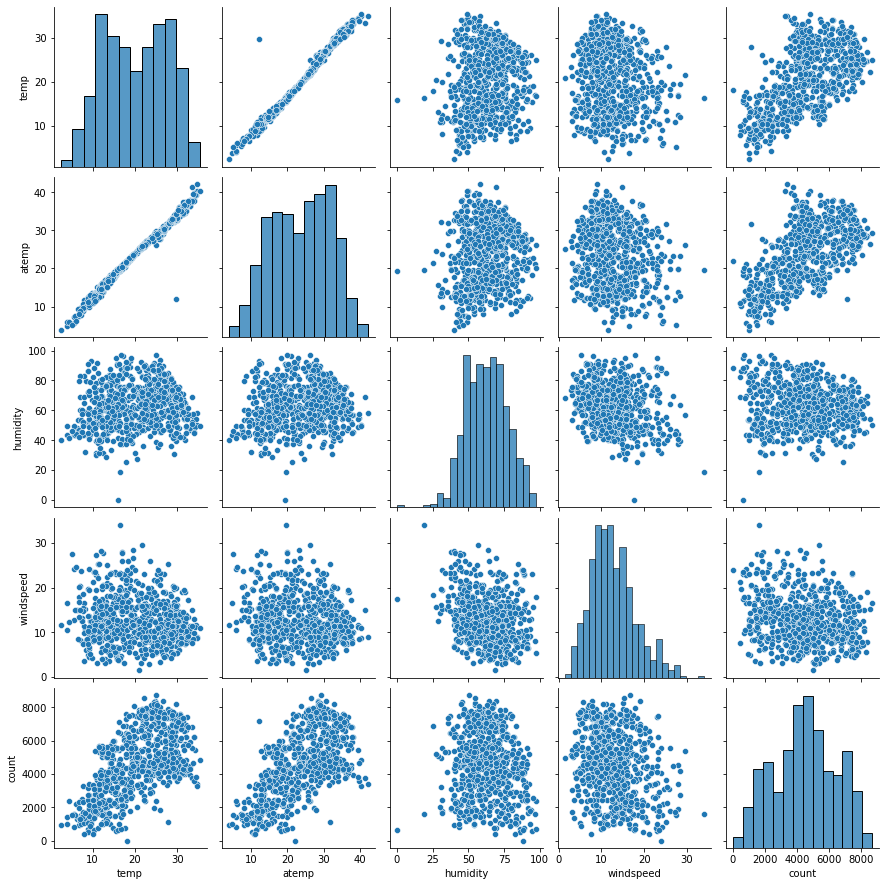

In [15]:
sns.pairplot(day_1[['temp', 'atemp', 'humidity', 'windspeed','count']])
plt.show()

**Inference:** 
- We can clearly see that "temp" and "atemp" has linear correlation with the target.
- It can also be seen that "temp" and "atemp" are highly correlated. So, "atemp" can be dropped.

In [16]:
# We will drop "atemp" to remove multicollinearity as it is highly correlated with "temp".

day_1.drop("atemp",axis=1,inplace=True)
day_1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Visualising Categorical Variables

- Make a boxplot for categorical variables.

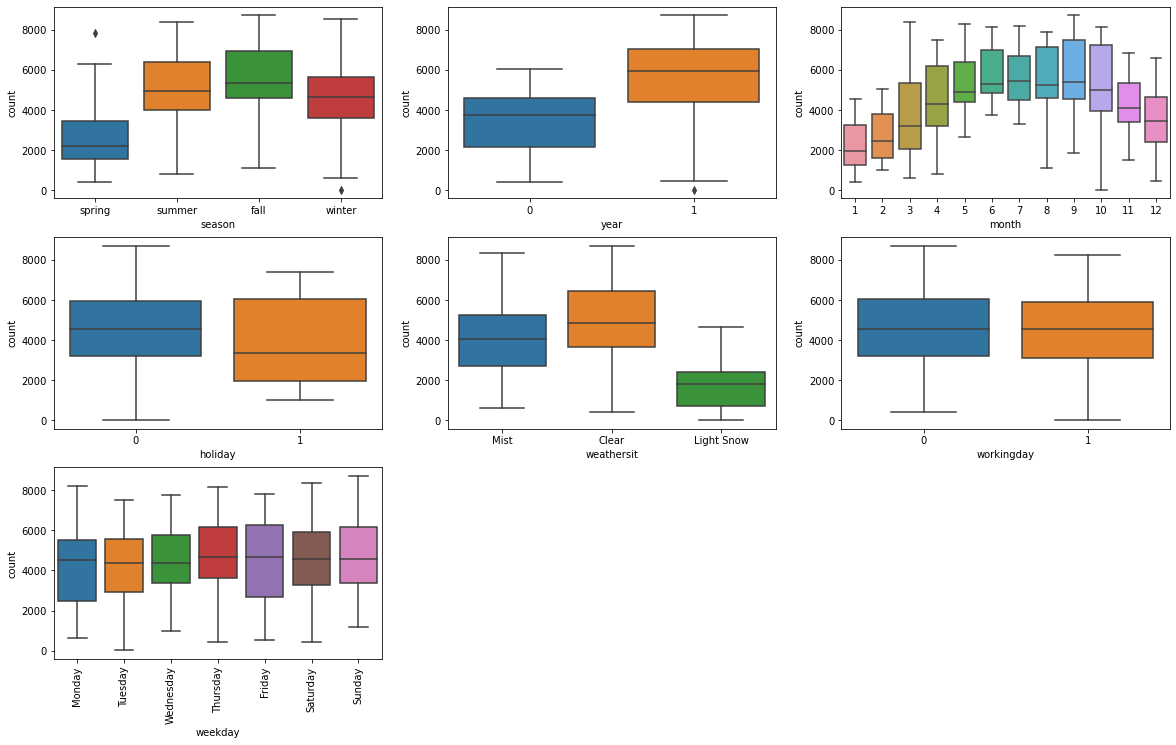

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = day_1)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = day_1)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = day_1)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = day_1)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day_1)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = day_1)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'count', data = day_1)
plt.xticks(rotation=90)
plt.show()

**Inference:** 
- We can see a high bike count in fall season followed by summer and winter.
- Bike counts has been increased in year 2019 compared to 2018.
- We can also conclude that the bike counts are high in months 5 to 9.
- The 25-75 percentile range of bike counts is high when there is holiday, but maximum counts when there is not a holiday.
- In weather is clear, the counts of bike is more compare to other weather.
- Weekday and workingday show a close trend and we can not conclude anything.

<div class="alert alert-block alert-info">
<h1><b> Data Preparation</b></h1>
</div> 

- We will create DUMMY variables for categorical variables- 'season', 'mnth', 'weekday' and 'weathersit'

In [18]:
# Create dummy variables and drop the first column of the dummy variable df using 'drop_first = True'

status1 = pd.get_dummies(day_1[["season", "weekday","weathersit"]], drop_first = True,prefix="",prefix_sep="")
status2 = pd.get_dummies(day_1[["month"]], drop_first = True)

In [19]:
# Add the results to the original housing dataframe and drop the original columns as we have created dummies for that.

day_2 = pd.concat([day_1,status1,status2],axis=1)
day_2.drop(["season", "month", "weekday", "weathersit"], axis=1, inplace=True)

In [20]:
pd.set_option('display.max_columns', 100)
day_2.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info">
<h1><b> Splitting the Data into Training and Testing Sets</b></h1>
</div>

In [21]:
# We specify random_state so that the train and test data set always have the same rows

df_train, df_test = train_test_split(day_2, train_size = 0.7, test_size = 0.3, random_state = 8)

### Checking the shape of train and test datasets

In [22]:
# Shape of train data
df_train.shape

(510, 29)

In [23]:
# Shape of test data
df_test.shape

(219, 29)

### Rescaling the Features

In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the numerical columns except the 'binary' and 'dummy' variables

num_vars = ["temp","humidity","windspeed","count"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.027451,0.692157,0.549924,0.648439,0.349268,0.514320,0.247059,0.256863,0.245098,0.145098,0.147059,0.135294,0.154902,0.129412,0.149020,0.029412,0.335294,0.072549,0.092157,0.092157,0.086275,0.072549,0.086275,0.082353,0.074510,0.086275,0.084314,0.090196
std,0.500487,0.163554,0.462054,0.228330,0.148035,0.166119,0.219895,0.431725,0.437332,0.430568,0.352545,0.354512,0.342373,0.362166,0.335985,0.356457,0.169124,0.472557,0.259649,0.289531,0.289531,0.281045,0.259649,0.281045,0.275172,0.262857,0.281045,0.278131,0.286744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349449,0.546587,0.229825,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.543270,0.651782,0.323711,0.518063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751329,0.755796,0.438454,0.674845,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check correlation

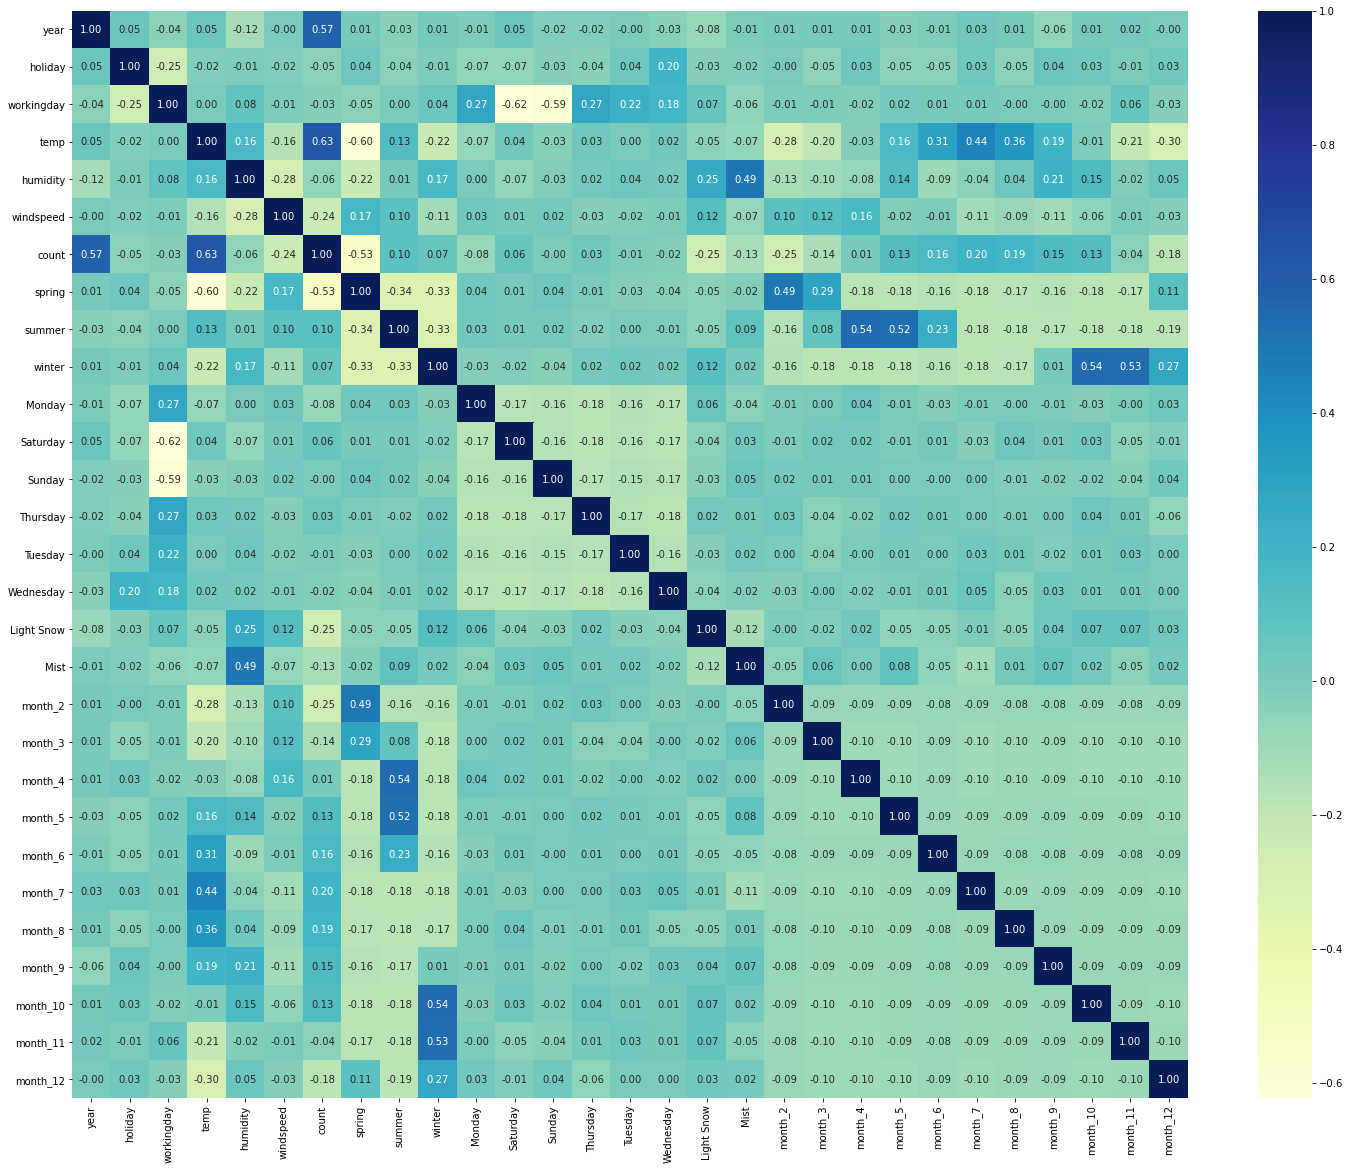

In [27]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",fmt="0.2f")
plt.show()

**Inference:** 
- The graph shows multicollinearity between variables.
- "temp", "year" and "spring" shows relatively high correlation with the target.

### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('count')
X_train = df_train

<div class="alert alert-block alert-info">
<h1><b> Building a linear model</b></h1>
</div>

### We will use Recursive feature elimination (RFE)

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 9),
 ('Sunday', False, 3),
 ('Thursday', False, 10),
 ('Tuesday', False, 7),
 ('Wednesday', False, 6),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('month_2', False, 4),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 13),
 ('month_8', False, 2),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 12),
 ('month_12', False, 14)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'Light Snow', 'Mist', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_9', 'month_10'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'month_2', 'month_7', 'month_8', 'month_11',
       'month_12'],
      dtype='object')

In [33]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]

## Building model using statsmodel for the detailed statistics

### MODEL-1

In [34]:
# Adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)

# Running the linear model
lm_1 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_1.params)

const         0.305541
year          0.233048
holiday      -0.092105
temp          0.482456
humidity     -0.180207
windspeed    -0.186270
spring       -0.073023
winter        0.077316
Light Snow   -0.227591
Mist         -0.043547
month_3       0.052016
month_4       0.058863
month_5       0.080616
month_6       0.019868
month_9       0.095658
month_10      0.064538
dtype: float64


In [35]:
# Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.56e-187
Time:                        12:50:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3055      0.034      9.018      0.0

### VIF check

In [36]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,24.99
2,temp,15.07
4,windspeed,5.46
5,spring,3.45
6,winter,3.42
8,Mist,2.26
0,year,2.06
14,month_10,1.61
10,month_4,1.59
11,month_5,1.49


### MODEL-2

In [37]:
# drop "month_6" as the p-value for this feature is very high
X_train_new = X_train_rfe.drop(["month_6"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new)

# Running the linear model
lm_2 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_2.params)

const         0.310528
year          0.232676
holiday      -0.093250
temp          0.485382
humidity     -0.183733
windspeed    -0.185198
spring       -0.076667
winter        0.073630
Light Snow   -0.227496
Mist         -0.043021
month_3       0.049794
month_4       0.054078
month_5       0.075755
month_9       0.091905
month_10      0.063887
dtype: float64


In [38]:
# Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.05e-187
Time:                        12:50:21   Log-Likelihood:                 519.19
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3105      0.034      9.237      0.0

### VIF check

In [39]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,24.99
2,temp,14.55
4,windspeed,5.40
5,spring,3.39
6,winter,3.35
8,Mist,2.26
0,year,2.06
13,month_10,1.60
10,month_4,1.53
11,month_5,1.40


### MODEL-3

In [40]:
# drop "humidity" because of high VIF value
X_train_new = X_train_new.drop(["humidity"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new)

# Running the linear model
lm_3 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_3.params)

const         0.208677
year          0.237839
holiday      -0.094360
temp          0.458327
windspeed    -0.147208
spring       -0.083068
winter        0.062871
Light Snow   -0.280022
Mist         -0.072551
month_3       0.052019
month_4       0.050842
month_5       0.062691
month_9       0.079783
month_10      0.058649
dtype: float64


In [41]:
# Summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.64e-184
Time:                        12:50:24   Log-Likelihood:                 507.24
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     496   BIC:                            -927.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2087      0.027      7.750      0.0

### VIF check

In [42]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.39
2,temp,4.32
5,winter,2.11
0,year,2.05
4,spring,2.01
12,month_10,1.59
7,Mist,1.53
9,month_4,1.36
10,month_5,1.27
8,month_3,1.26


### MODEL-4

In [43]:
# drop "windspeed" as VIF value is greater than 5
X_train_new1 = X_train_new.drop(["windspeed"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new1)

# Running the linear model
lm_4 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_4.params)

const         0.157572
year          0.237405
holiday      -0.091439
temp          0.463755
spring       -0.091458
winter        0.065118
Light Snow   -0.298089
Mist         -0.069340
month_3       0.045102
month_4       0.034790
month_5       0.059173
month_9       0.084021
month_10      0.057755
dtype: float64


In [44]:
# Summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.66e-178
Time:                        12:50:26   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     497   BIC:                            -900.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.026      6.008      0.0

### VIF check

In [45]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.69
0,year,2.05
4,winter,1.90
11,month_10,1.59
6,Mist,1.53
3,spring,1.41
9,month_5,1.24
7,month_3,1.23
10,month_9,1.22
8,month_4,1.18


### MODEL-5

In [46]:
# drop "month_4" due to high p-value
X_train_new2 = X_train_new1.drop(["month_4"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new2)

# Running the linear model
lm_5 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_5.params)

const         0.185464
year          0.238099
holiday      -0.089929
temp          0.436283
spring       -0.110056
winter        0.048851
Light Snow   -0.296709
Mist         -0.069343
month_3       0.039971
month_5       0.049381
month_9       0.079365
month_10      0.060536
dtype: float64


In [47]:
# Summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.19e-178
Time:                        12:50:29   Log-Likelihood:                 488.75
No. Observations:                 510   AIC:                            -953.5
Df Residuals:                     498   BIC:                            -902.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1855      0.022      8.364      0.0

### VIF check

In [48]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.56
0,year,2.03
4,winter,1.86
10,month_10,1.58
6,Mist,1.50
3,spring,1.38
7,month_3,1.23
8,month_5,1.21
9,month_9,1.19
5,Light Snow,1.06


### MODEL-6

In [49]:
# drop "month_3" as we try to achieve model with very low p-value and with minimum features 
X_train_new3 = X_train_new2.drop(["month_3"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new3)

# Running the linear model
lm_6 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_6.params)

const         0.193198
year          0.238368
holiday      -0.094604
temp          0.429536
spring       -0.106690
winter        0.043505
Light Snow   -0.296031
Mist         -0.067631
month_5       0.045269
month_9       0.077136
month_10      0.061217
dtype: float64


In [50]:
# Summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.12e-178
Time:                        12:50:31   Log-Likelihood:                 485.28
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     499   BIC:                            -902.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.022      8.741      0.0

### VIF check

In [51]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.54
0,year,2.03
4,winter,1.85
9,month_10,1.58
6,Mist,1.49
3,spring,1.25
7,month_5,1.20
8,month_9,1.19
5,Light Snow,1.06
1,holiday,1.04


### MODEL-7

In [52]:
# drop "month_5"
X_train_new4 = X_train_new3.drop(["month_5"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new4)

# Running the linear model
lm_7 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_7.params)

const         0.204489
year          0.237674
holiday      -0.097280
temp          0.425064
spring       -0.116752
winter        0.034658
Light Snow   -0.298067
Mist         -0.065598
month_9       0.070939
month_10      0.061087
dtype: float64


In [53]:
# Summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.41e-177
Time:                        12:50:34   Log-Likelihood:                 481.17
No. Observations:                 510   AIC:                            -942.3
Df Residuals:                     500   BIC:                            -900.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2045      0.022      9.338      0.0

### VIF check

In [54]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.32
0,year,2.03
4,winter,1.83
8,month_10,1.58
6,Mist,1.46
3,spring,1.23
7,month_9,1.17
5,Light Snow,1.06
1,holiday,1.04


### MODEL-8

In [55]:
# drop "winter"
X_train_new4 = X_train_new4.drop(["winter"], axis = 1)

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_new4)

# Running the linear model
lm_8 = sm.OLS(y_train,X_train_sm).fit()   

# parameters of the model
print(lm_8.params)

const         0.236735
year          0.239033
holiday      -0.098796
temp          0.386439
spring       -0.137289
Light Snow   -0.295987
Mist         -0.066907
month_9       0.075080
month_10      0.084182
dtype: float64


In [56]:
# Summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.26e-177
Time:                        12:50:36   Log-Likelihood:                 478.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     501   BIC:                            -900.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.017     13.828      0.0

### VIF check

In [57]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.32
0,year,1.96
5,Mist,1.43
3,spring,1.21
6,month_9,1.16
7,month_10,1.12
1,holiday,1.04
4,Light Snow,1.04


- **Inference**: *From the VIF we can conclude that there is no multicollinearity existing between the predictor variables, as all the values are in permissible range.*

<div class="alert alert-block alert-info">
<h1><b> Residual Analysis of the train data</b></h1>
</div>

In [58]:
y_train_pred = lm_8.predict(X_train_sm)

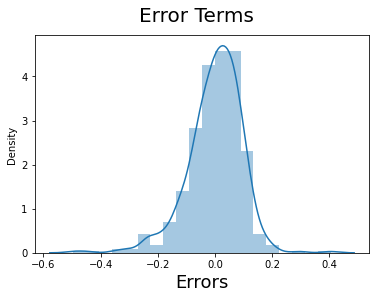

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 20) 
# X-label
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

- **Inference** : *Error is normally distributed.*

### Residual calulation

In [60]:
res = (y_train - y_train_pred)

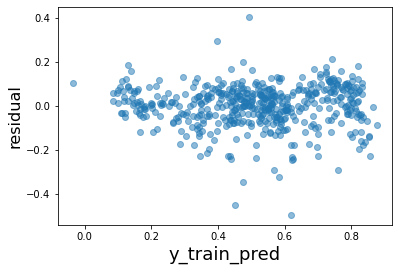

In [61]:
# Plot of residual vs y_pred

plt.scatter(y_train_pred,res,alpha=0.5)
plt.xlabel('y_train_pred', fontsize = 18)                         
plt.ylabel('residual', fontsize = 16) 
plt.show()

- **Inference** : *There is no pattern in scatter plot for error.*

<div class="alert alert-block alert-info">
<h1><b> Making Predictions Using the Final Model</b></h1>
</div>

### Applying the scaling on the test sets

In [62]:
num_vars = ["temp","humidity","windspeed","count"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [63]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.031963,0.684932,0.527720,0.515663,0.373201,0.505024,0.246575,0.237443,0.242009,0.141553,0.132420,0.159817,0.109589,0.178082,0.127854,0.027397,0.342466,0.086758,0.063927,0.059361,0.082192,0.105023,0.082192,0.091324,0.100457,0.082192,0.077626,0.073059
std,0.501098,0.176306,0.465607,0.248286,0.194341,0.186739,0.246372,0.432005,0.426491,0.429281,0.349389,0.339723,0.367276,0.313092,0.383458,0.334692,0.163612,0.475622,0.282125,0.245183,0.236840,0.275286,0.307285,0.275286,0.288730,0.301297,0.275286,0.268194,0.260830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.317668,0.353248,0.249971,0.341139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.562175,0.501160,0.367086,0.513557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751136,0.658642,0.481701,0.698238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('count')
X_test = df_test

In [65]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [66]:
# Creating X_test_sm dataframe by dropping variables from X_test_sm

X_test_sm = X_test_sm.drop(["workingday", "humidity", "windspeed", "summer", "winter", "Monday","Saturday",
                            "Sunday","Thursday","Tuesday","Wednesday", "month_2", "month_3", "month_4", "month_5",
                            "month_6","month_7","month_8","month_11","month_12"],axis=1)

In [67]:
# Prediction of test data

y_test_pred = lm_8.predict(X_test_sm)

<div class="alert alert-block alert-info">
<h1><b> Model Evaluation</b></h1>
</div>

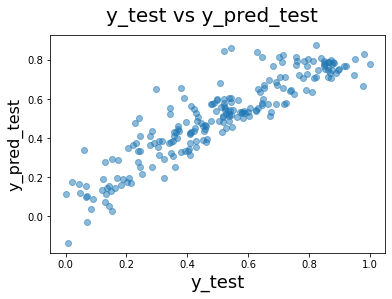

In [68]:
# Plotting y_test and y_pred_test to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.5)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)                          # Y-label
plt.show()

### R-squared and Adjusted R-squared calculation for train and test set

In [69]:
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

# Get the shape of X_test and X_train
X_test.shape
X_train.shape

# n is number of rows in X
n1 = X_train_sm.shape[0]
n2 = X_test_sm.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p1 = X_train_sm.shape[1]
p2 = X_test_sm.shape[1]

# We find the Adjusted R-squared using the formula
r2 = r2_score(y_test, y_test_pred)
adjusted_r2_test = 1-(1-r2)*(n2-1)/(n2-p2-1)


# We find the Adjusted R-squared using the formula
r2 = r2_score(y_train, y_train_pred)
adjusted_r2_train = 1-(1-r2)*(n1-1)/(n1-p1-1)

data = {'Train':[R2_train*100, adjusted_r2_train*100],
        'Test':[R2_test*100, adjusted_r2_test*100]}
df = pd.DataFrame(data,index =['R-squared(%)','Adjusted R-squared(%)'])
df

,Train,Test
R-squared(%),81.412926,81.913224
Adjusted R-squared(%),81.078359,81.134368


### Root mean squared error

In [70]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.10453883527591516

## Validate Assumptions 

- Pairplot shows linear correlation with target variable.
- VIF table shows that there is no multicollinearity.
- Errors are normally distributed.
- There is no pattern in scatterplot of residual(error) vs predicted values. This means there is no heteroskedacity.
- The Durbin Watson (DW) value is around 2.0 which indicates that there is no autocorrelation detected in the data.

## The equation of best fitted model-
<div class="alert alert-success">
  <strong>count </strong> = 0.236735+(yr×0.239033)-(holiday×0.098796)+(temp×0.386439)-(spring×0.137289)+(month_9×0.075080)+(month_10×0.084182)−(Mist×0.066907)−(Light Snow×0.295987).
</div>

## Explanation of variables-

- The top 3 predictors that affects the bike demand are-
  1. "temp" has coefficient value of 0.386439 which indicates that a unit increase in temperature variable, the bike demand will increase by 0.386439 units.
  2. “Light Snow” has coefficient value of 0.295987, with respect to “clear” weather, which indicates that a unit increase in this variable, the bike demand will decrease by 0.295987.
  3. "year" has coefficient value of 0.239033 which indicates that a unit increase in year variable, the bike demand will increase by 0.239033 units.

- So, it is recommended to give these variables utmost importance to increase bike demand.
- The other features which affect bike demand are-

  1. "Spring" has coefficient value of -0.137289, with respect to fall, which indicates that a unit increase in "spring" variable, the bike demand will decrease by 0.137289 units.
  2. "Holiday" has coefficient value of -0.098796 which indicates that a unit increase in "holiday" variable, the bike demand will decrease by 0.098796 units.
  3. "month _10" has coefficients value of 0.084182, with respect to "month_1",  which indicates that a unit increase in variable, the bike demand will increase by 0.084182 units.
  4. "month_9" has coefficients value of 0.075080, with respect to "month_1",  which indicates that a unit increase in variable, the bike demand will increase by 0.075080 units.
  5. "Mist" has coefficient value of 0.066907, with respect to “clear” weather, which indicates that a unit increase in these variables, the bike demand will decrease by 0.066907.

## Final Comparison
<div class="alert alert-success">
  <strong> </strong> 
    
- R-squared value (train): 81.41%
- R-squared value (test): 81.91%
- Adj. R-squared value (train) dataset: 81.08%
- Adj. R-squared value (test) dataset: 81.13%
    </div>